

## Multiplicative Model Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

### Multiplicative model

### Multiplicative Decomposition

* An additive model suggests that the components are multipled together.
* An additive model is non-linear such as quadratic or exponential. 
* Changes increase or decrease over time.
* A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

**Perform multiplicative model decomposition on International Air Passengers Data.**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

**Perform multiplicative model decomposition on International Air Passengers Data.**

In [46]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [47]:
df.dropna(inplace=True)

In [48]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


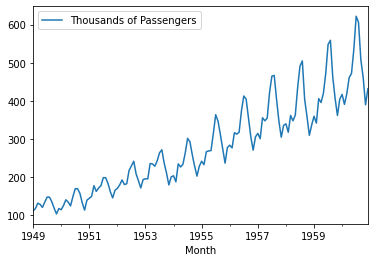

In [49]:
df.plot();

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

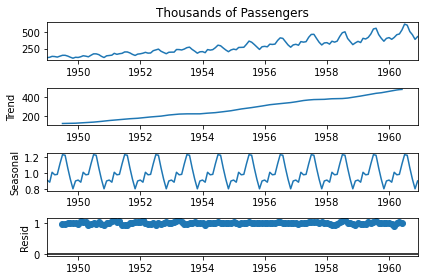

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

Running the above code performs the decomposition, and plots the 4 resulting series.
We observe that the trend and seasonality are clearly separated.

In [51]:
seasonal = result.seasonal
seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: seasonal, dtype: float64

## Holt Winters Multiplicative Models

___
## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

* One of the drawbacks of the single exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES and also known as Double Exponential model
* Applicable when data has Trend but no seasonality
* Two separate components are considered: Level and Trend
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

### Perform standard imports and load the dataset
For these examples we'll continue to use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [52]:

df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [53]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [54]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


##### Comparing Holt Winters Model with Multiplicative Trend and Additive Trend

Model 1 : Time Series model with additive trend

In [55]:
from statsmodels.tsa.api import Holt

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df['DESaddtrend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add',damped_trend=True).fit().fittedvalues
fit0= ExponentialSmoothing(df['Thousands of Passengers'], trend='add',damped_trend=True).fit()

Model 2 : Time series with multiplicative trend

In [57]:
df['DESmultitrend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',missing='drop',damped_trend=True).fit().fittedvalues
fit1 = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',missing='drop').fit()

df.head()

,Thousands of Passengers,DESaddtrend,DESmultitrend
Month,,,
1949-01-01,112,120.506667,118.993641
1949-02-01,118,114.061295,112.781582
1949-03-01,132,119.979269,118.751357
1949-04-01,129,133.920053,132.793880
1949-05-01,121,130.984471,129.847421


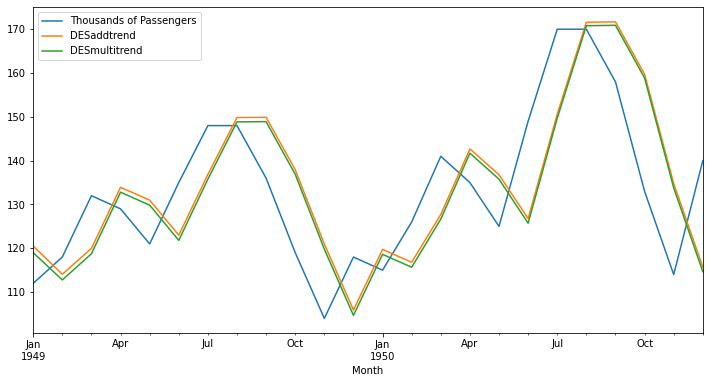

In [66]:
#df[['Thousands of Passengers','DESaddtrend','DESmultitrend']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
df[['Thousands of Passengers','DESaddtrend','DESmultitrend']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [59]:

print(f'Additive Trend Model BIC: {fit0.bic: .3f}')
print(f'Multiplicative Trend Model BIC: {fit1.bic:.3f}')


Additive Trend Model BIC:  1037.043
Multiplicative Trend Model BIC: 1035.851


___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



Model 1 = Time Series model with no trend and additive seasonality

In [61]:
df['TES_addseas_notrend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend=None, seasonal='additive').fit().fittedvalues
fit2=ExponentialSmoothing(df['Thousands of Passengers'], trend=None, seasonal='additive').fit()


Model 2 = Time Series model with no trend and multiplicative seasonality

In [62]:

df['TES_multseas_notrend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend=None, seasonal='multiplicative').fit().fittedvalues
fit3=ExponentialSmoothing(df['Thousands of Passengers'], trend=None, seasonal='multiplicative').fit()

In [63]:
df.head()

,Thousands of Passengers,DESaddtrend,DESmultitrend,TES_addseas_notrend,TES_multseas_notrend
Month,,,,,
1949-01-01,112,120.506667,118.993641,112.042679,112.000231
1949-02-01,118,114.061295,112.781582,118.418678,106.348994
1949-03-01,132,119.979269,118.751357,130.864163,134.016945
1949-04-01,129,133.920053,132.793880,125.404766,130.431483
1949-05-01,121,130.984471,129.847421,117.677198,131.053327


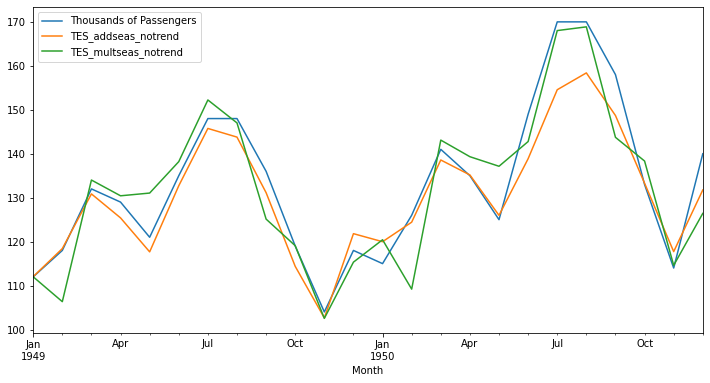

In [65]:
df[['Thousands of Passengers','TES_addseas_notrend','TES_multseas_notrend']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [72]:
# from sklearn.metrics import  mean_squared_error

# rmse_opt=  np.sqrt(mean_squared_error(df['Thousands of Passengers'],df['TES_addseas_notrend']))
# rmse_opt2=  np.sqrt(mean_squared_error(df['Thousands of Passengers'],df['TES_multseas_notrend']))
# rmse_opt3=  np.sqrt(mean_squared_error(df['Thousands of Passengers'],df['DESaddtrend']))
# rmse_opt4=  np.sqrt(mean_squared_error(df['Thousands of Passengers'],df['DESmultitrend']))

Here we can see that both the models are giving results which are trending way beyond the actual values

In [29]:
print(f'Additive Seasonality with No trend Model BIC: {fit2.bic: .3f}')
print(f'Multiplicative Seasonality with No trend Model BIC: {fit3.bic:.3f}')


Additive Seasonality with No trend Model BIC:  833.003
Multiplicative Seasonality with No trend Model BIC: 735.833


Model 3 : Time series model with additive trend and additive seasonality

In [77]:
df['TES_addtrend_addseas'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add',seasonal='additive',damped_trend=True).fit().fittedvalues
fit4 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add',seasonal='additive',damped_trend=True).fit()

Model 4 : Time Series with mutliplicative trend and multiplicative seasonality

In [78]:
df['TES_multrend_multiseas'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='multiplicative',damped_trend=True).fit().fittedvalues
fit5 = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='multiplicative',damped_trend=True).fit()

df.head()

,Thousands of Passengers,DESaddtrend,DESmultitrend,TES_addseas_notrend,TES_multseas_notrend,TES_multrend_multiseas,TES_addtrend_addseas
Month,,,,,,,
1949-01-01,112,120.506667,118.993641,112.042679,112.000231,112.402436,112.133325
1949-02-01,118,114.061295,112.781582,118.418678,106.348994,119.841025,119.352132
1949-03-01,132,119.979269,118.751357,130.864163,134.016945,135.338627,133.560828
1949-04-01,129,133.920053,132.793880,125.404766,130.431483,129.511625,129.624783
1949-05-01,121,130.984471,129.847421,117.677198,131.053327,123.130188,122.458437


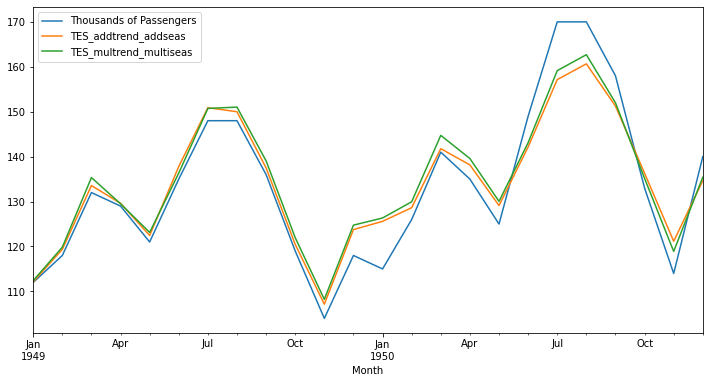

In [79]:
df[['Thousands of Passengers','TES_addtrend_addseas','TES_multrend_multiseas']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [80]:
print(f'Additive Seasonality with additive trend Model BIC: {fit4.bic: .3f}')
print(f'Multiplicative Seasonality with multiplicative trend Model BIC: {fit5.bic:.3f}')

Additive Seasonality with additive trend Model BIC:  811.112
Multiplicative Seasonality with multiplicative trend Model BIC: 765.664


Model 5 :  Model with additive trend and multiplicative seasonality

In [81]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import  mean_squared_error

In [82]:
df['TES_addtrend_mulseas'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='mul',seasonal_periods=12,damped_trend=True).fit().fittedvalues
fit6 = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='mul',seasonal_periods=12,damped_trend=True).fit()

Model 6 :  Model with multiplicative trend and additive seasonality

In [83]:
df['TES_multrend_addseas'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='add',seasonal_periods=12,damped_trend=True).fit().fittedvalues
fit7= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='add',seasonal_periods=12,damped_trend=True).fit()

In [84]:
df.head()

,Thousands of Passengers,DESaddtrend,DESmultitrend,TES_addseas_notrend,TES_multseas_notrend,TES_multrend_multiseas,TES_addtrend_addseas,TES_addtrend_mulseas,TES_multrend_addseas
Month,,,,,,,,,
1949-01-01,112,120.506667,118.993641,112.042679,112.000231,112.402436,112.133325,111.825430,111.557562
1949-02-01,118,114.061295,112.781582,118.418678,106.348994,119.841025,119.352132,119.187237,117.287856
1949-03-01,132,119.979269,118.751357,130.864163,134.016945,135.338627,133.560828,133.253740,141.016626
1949-04-01,129,133.920053,132.793880,125.404766,130.431483,129.511625,129.624783,128.060402,129.935486
1949-05-01,121,130.984471,129.847421,117.677198,131.053327,123.130188,122.458437,121.007547,128.390345


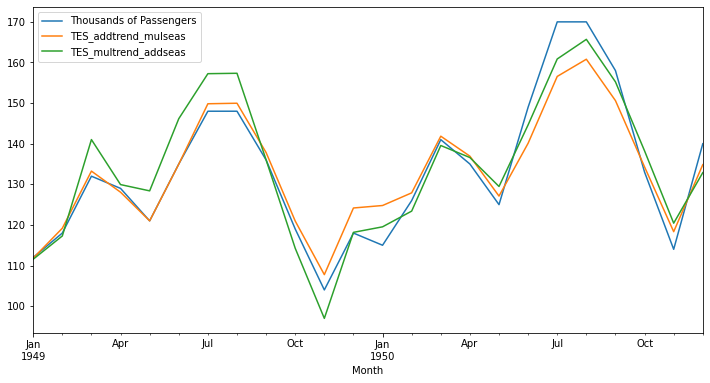

In [85]:
df[['Thousands of Passengers','TES_addtrend_mulseas','TES_multrend_addseas']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [86]:
print(f'Multiplicative Seasonality with additive trend Model BIC: {fit6.bic: .3f}')
print(f'Additive Seasonality with multiplicative trend Model BIC: {fit7.bic:.3f}')

Multiplicative Seasonality with additive trend Model BIC:  770.898
Additive Seasonality with multiplicative trend Model BIC: 815.048


Now comparing the BIC values for all the models.

In [87]:

print(f'Additive Trend Model BIC: {fit0.bic: .3f}')
print(f'Multiplicative Trend Model BIC: {fit1.bic:.3f}')
print(f'Additive Seasonality with No trend Model BIC: {fit2.bic: .3f}')
print(f'Multiplicative Seasonality with No trend Model BIC: {fit3.bic:.3f}')
print(f'Additive Seasonality with additive trend Model BIC: {fit4.bic: .3f}')
print(f'Multiplicative Seasonality with multiplicative trend Model BIC: {fit5.bic:.3f}')
print(f'Multiplicative Seasonality with additive trend Model BIC: {fit6.bic: .3f}')
print(f'Additive Seasonality with multiplicative trend Model BIC: {fit7.bic:.3f}')

Additive Trend Model BIC:  1037.043
Multiplicative Trend Model BIC: 1035.851
Additive Seasonality with No trend Model BIC:  833.003
Multiplicative Seasonality with No trend Model BIC: 735.833
Additive Seasonality with additive trend Model BIC:  811.112
Multiplicative Seasonality with multiplicative trend Model BIC: 765.664
Multiplicative Seasonality with additive trend Model BIC:  770.898
Additive Seasonality with multiplicative trend Model BIC: 815.048


Comparing AIC values for all models

In [88]:
print(f'Additive Trend Model AIC: {fit0.aic: .3f}')
print(f'Multiplicative Trend Model AIC: {fit1.aic:.3f}')
print(f'Additive Seasonality with No trend Model AIC: {fit2.aic: .3f}')
print(f'Multiplicative Seasonality with No trend Model AIC: {fit3.aic:.3f}')
print(f'Additive Seasonality with additive trend Model AIC: {fit4.aic: .3f}')
print(f'Multiplicative Seasonality with multiplicative trend Model AIC: {fit5.aic:.3f}')
print(f'Multiplicative Seasonality with additive trend Model AIC: {fit6.aic: .3f}')
print(f'Additive Seasonality with multiplicative trend Model AIC: {fit7.aic:.3f}')

Additive Trend Model AIC:  1022.194
Multiplicative Trend Model AIC: 1023.972
Additive Seasonality with No trend Model AIC:  791.425
Multiplicative Seasonality with No trend Model AIC: 694.255
Additive Seasonality with additive trend Model AIC:  760.626
Multiplicative Seasonality with multiplicative trend Model AIC: 715.177
Multiplicative Seasonality with additive trend Model AIC:  720.411
Additive Seasonality with multiplicative trend Model AIC: 764.562


Here we find that Model with lowest AIC and BIC is fit3 model with AIC as 694 and BIC as 735, which corresponds to Mutliplicative Seasonality with No trend Model.